In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/raw.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [11]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [12]:
numerics_features = [feature for feature in df.columns if df[feature].dtype != 'O' ]
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O' ]

In [13]:
numerics_features

['math_score', 'reading_score', 'writing_score']

In [14]:
categorical_features

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [16]:
df['total_score'] = df['math_score']+df['writing_score']+df['reading_score']
df['average'] = df['total_score']/3

In [17]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [21]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()
print("Number of students with fulll marks in writing",writing_full)
print("Number of students with fulll marks in reading",reading_full)
print("Number of students with fulll marks in math",math_full)

Number of students with fulll marks in writing 14
Number of students with fulll marks in reading 17
Number of students with fulll marks in math 7


In [23]:
reading_less20 = df[df['reading_score'] <= 20]['average'].count()
writing_less20 = df[df['writing_score'] <= 20]['average'].count()
math_less20 = df[df['math_score'] <= 20]['average'].count()
print("Number of students with less than  20 marks in writing",writing_less20)
print("Number of students with less than  20 marks in reading",reading_less20)
print("Number of students with less than  20 marks in math",math_less20)


Number of students with less than  20 marks in writing 3
Number of students with less than  20 marks in reading 1
Number of students with less than  20 marks in math 4


<Axes: xlabel='average', ylabel='Count'>

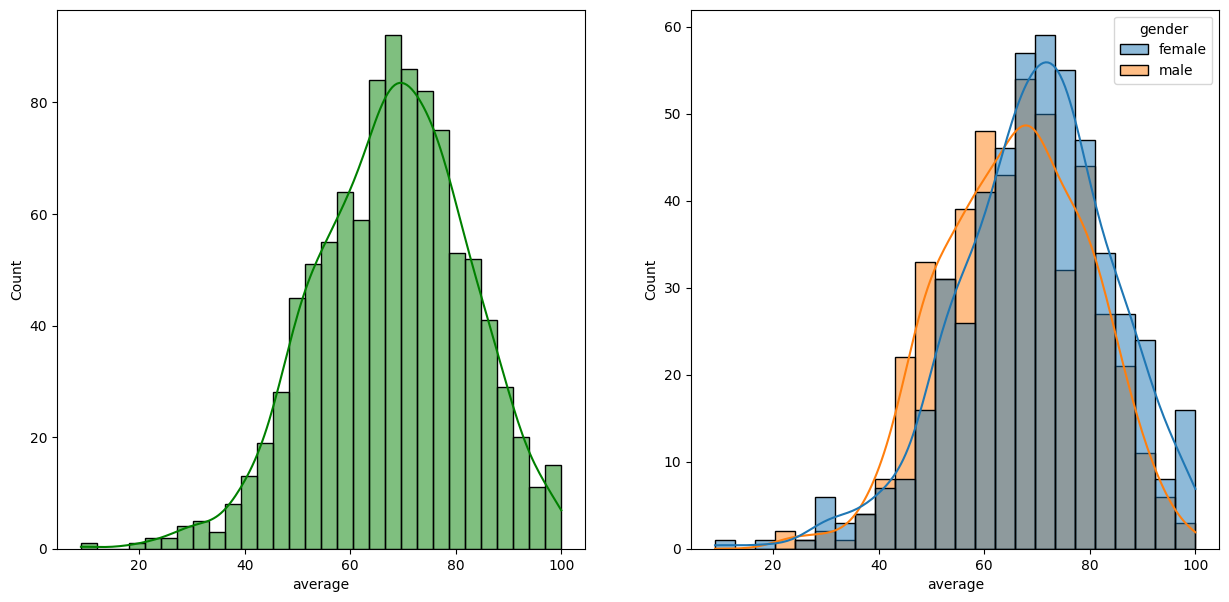

In [28]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data = df,x='average',kde = True,bins =30,color= 'g')
plt.subplot(122)
sns.histplot(data = df,x='average',kde=True,hue='gender')

<Axes: xlabel='math_score', ylabel='Count'>

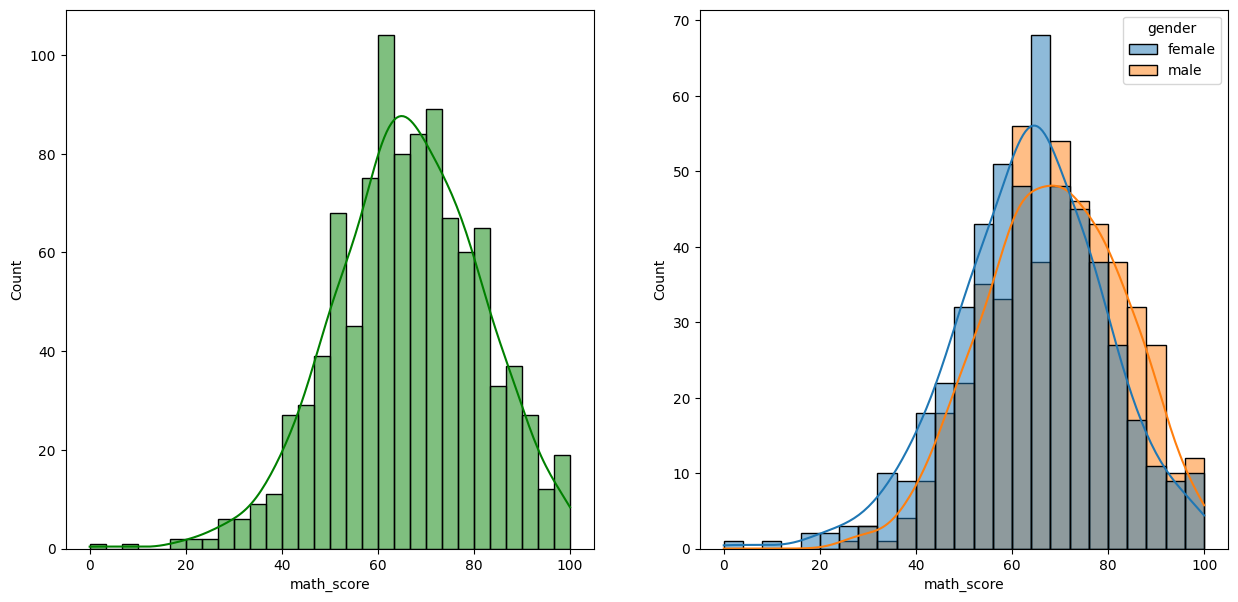

In [29]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data = df,x='math_score',kde = True,bins =30,color= 'g')
plt.subplot(122)
sns.histplot(data = df,x='math_score',kde=True,hue='gender')

<Axes: xlabel='reading_score', ylabel='Count'>

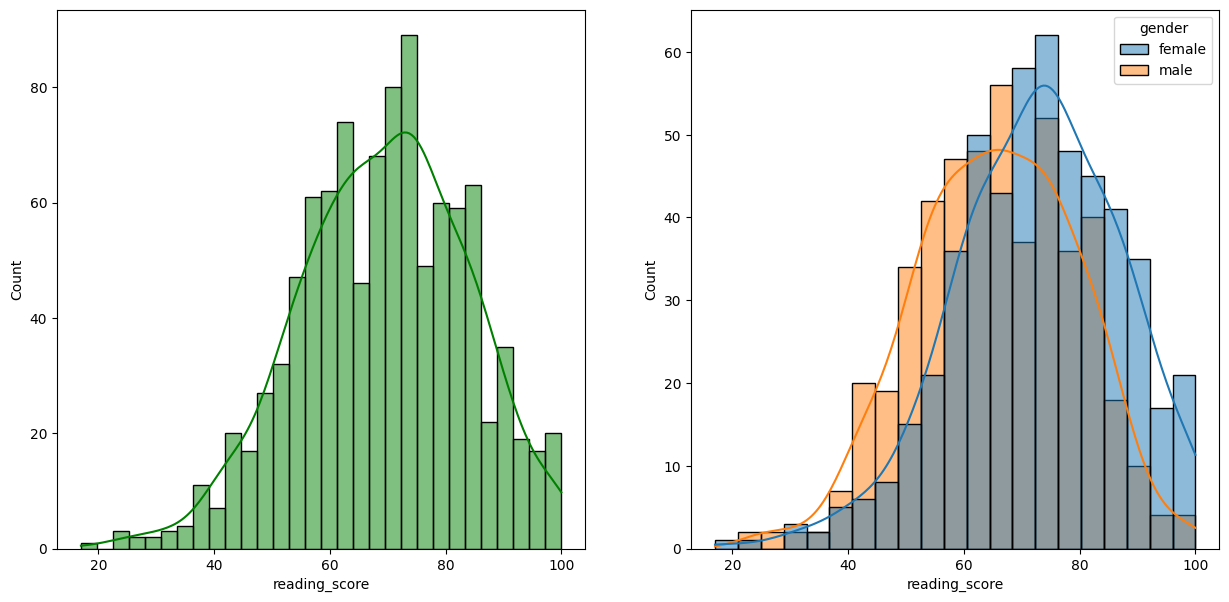

In [30]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data = df,x='reading_score',kde = True,bins =30,color= 'g')
plt.subplot(122)
sns.histplot(data = df,x='reading_score',kde=True,hue='gender')

<Axes: xlabel='writing_score', ylabel='Count'>

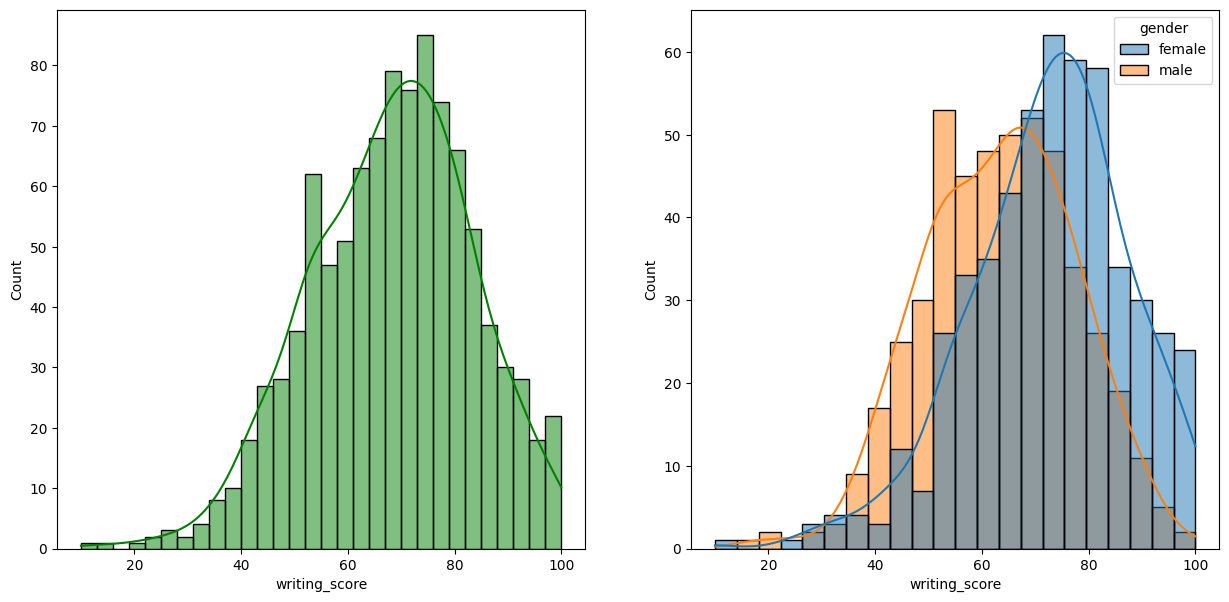

In [31]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data = df,x='writing_score',kde = True,bins =30,color= 'g')
plt.subplot(122)
sns.histplot(data = df,x='writing_score',kde=True,hue='gender')

<Axes: xlabel='total_score', ylabel='Count'>

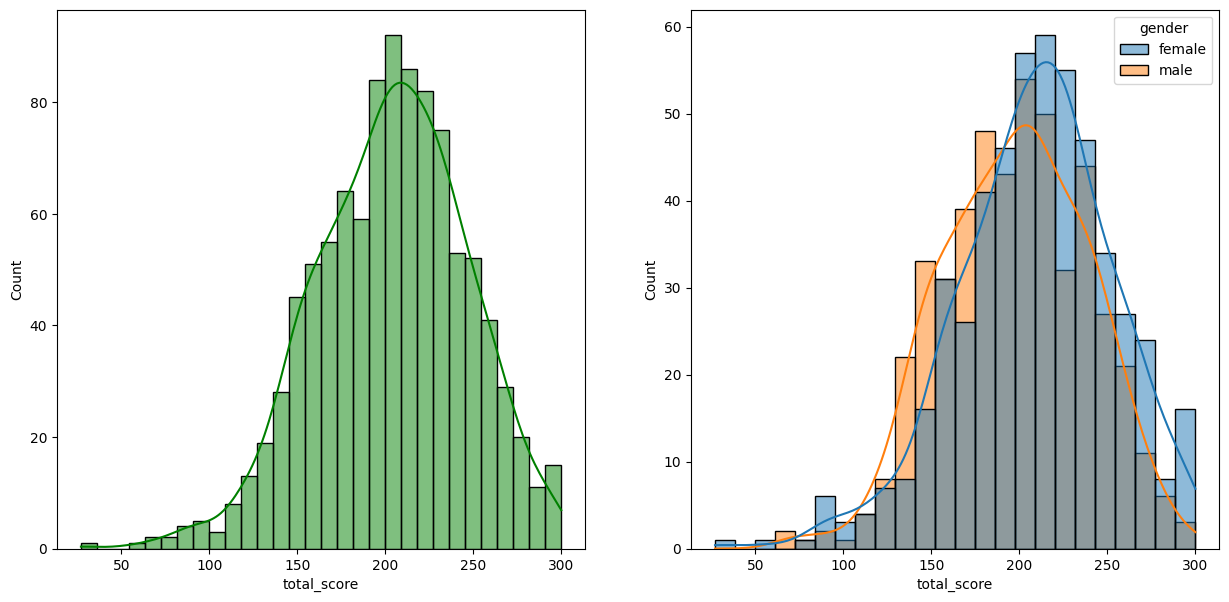

In [32]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data = df,x='total_score',kde = True,bins =30,color= 'g')
plt.subplot(122)
sns.histplot(data = df,x='total_score',kde=True,hue='gender')

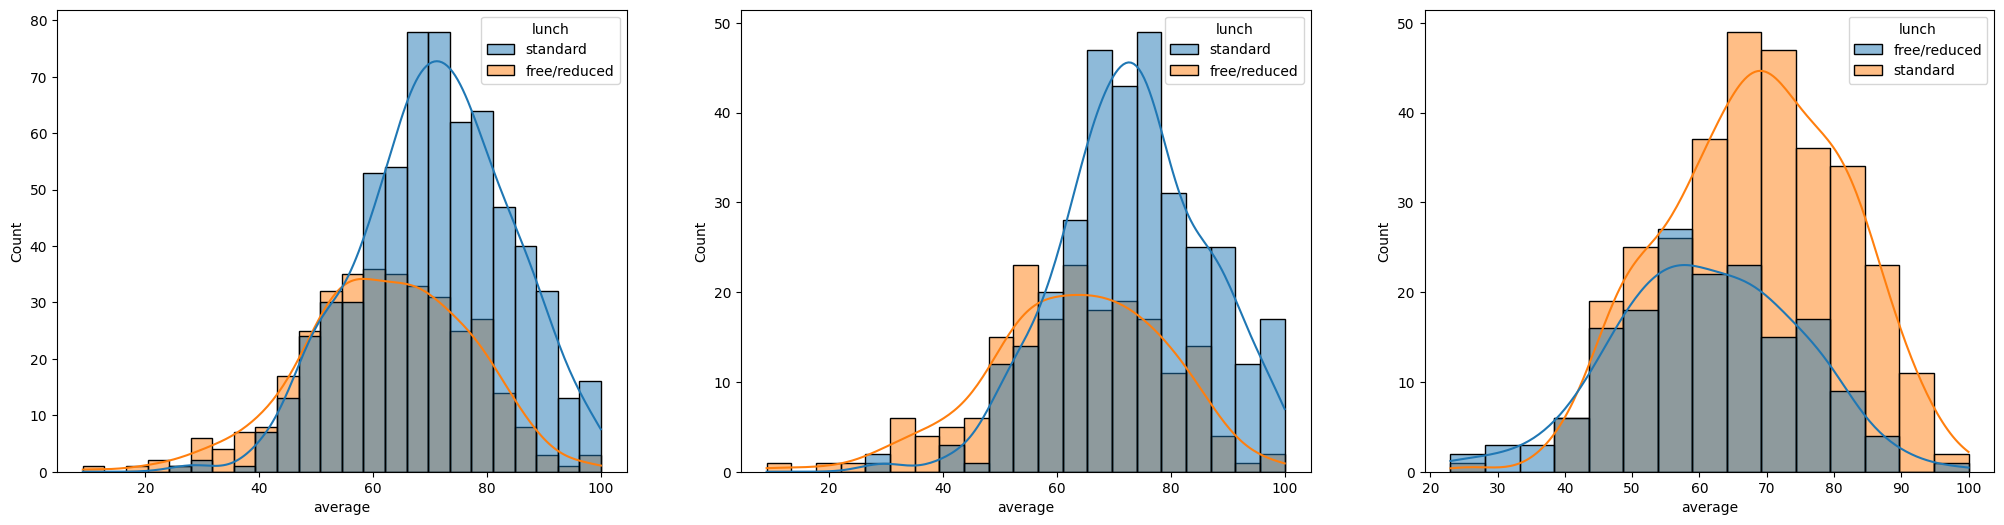

In [37]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde= True,hue='lunch')
plt.subplot(132)
sns.histplot(data = df[df['gender']=='female'],x='average',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df['gender']=='male'],x='average',kde=True,hue='lunch')
plt.show()

In [38]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average'],
      dtype='object')

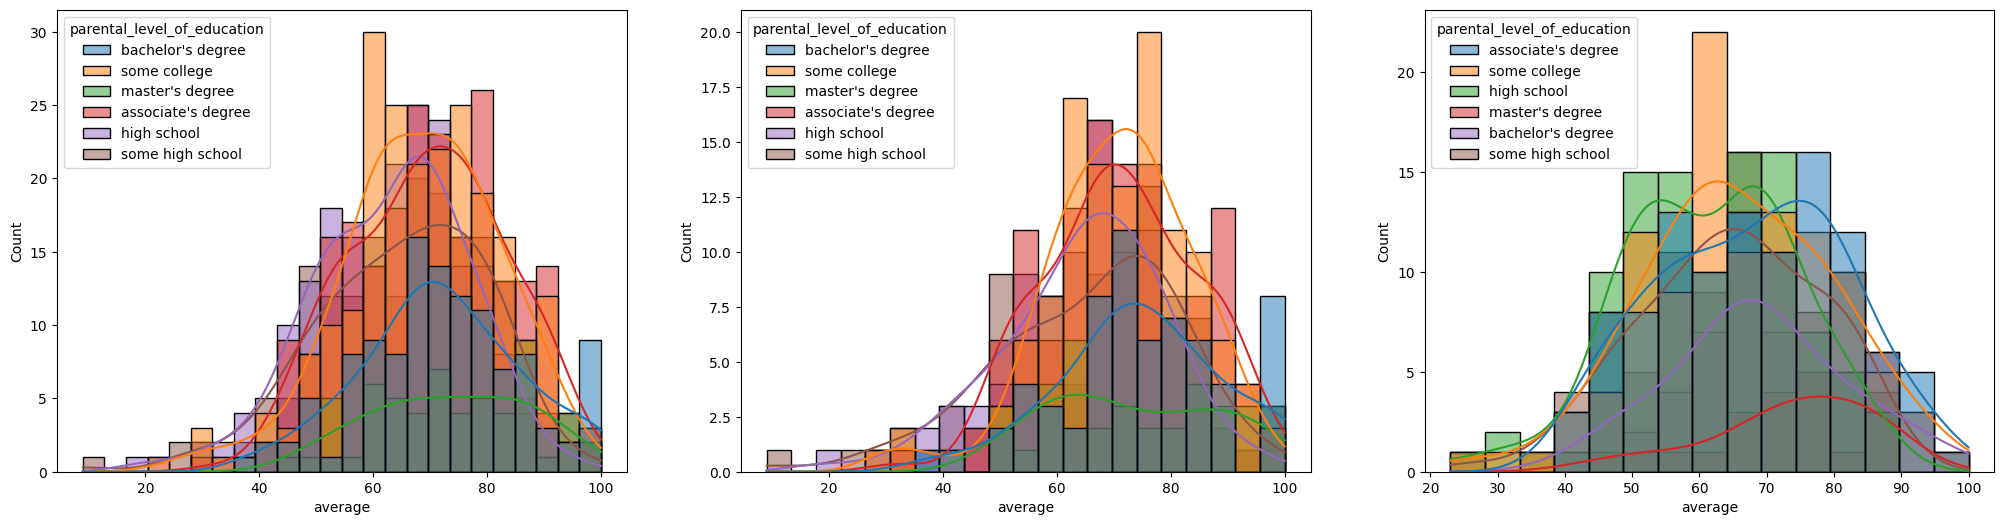

In [39]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde= True,hue='parental_level_of_education')
plt.subplot(132)
sns.histplot(data = df[df['gender']=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(133)
sns.histplot(data=df[df['gender']=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

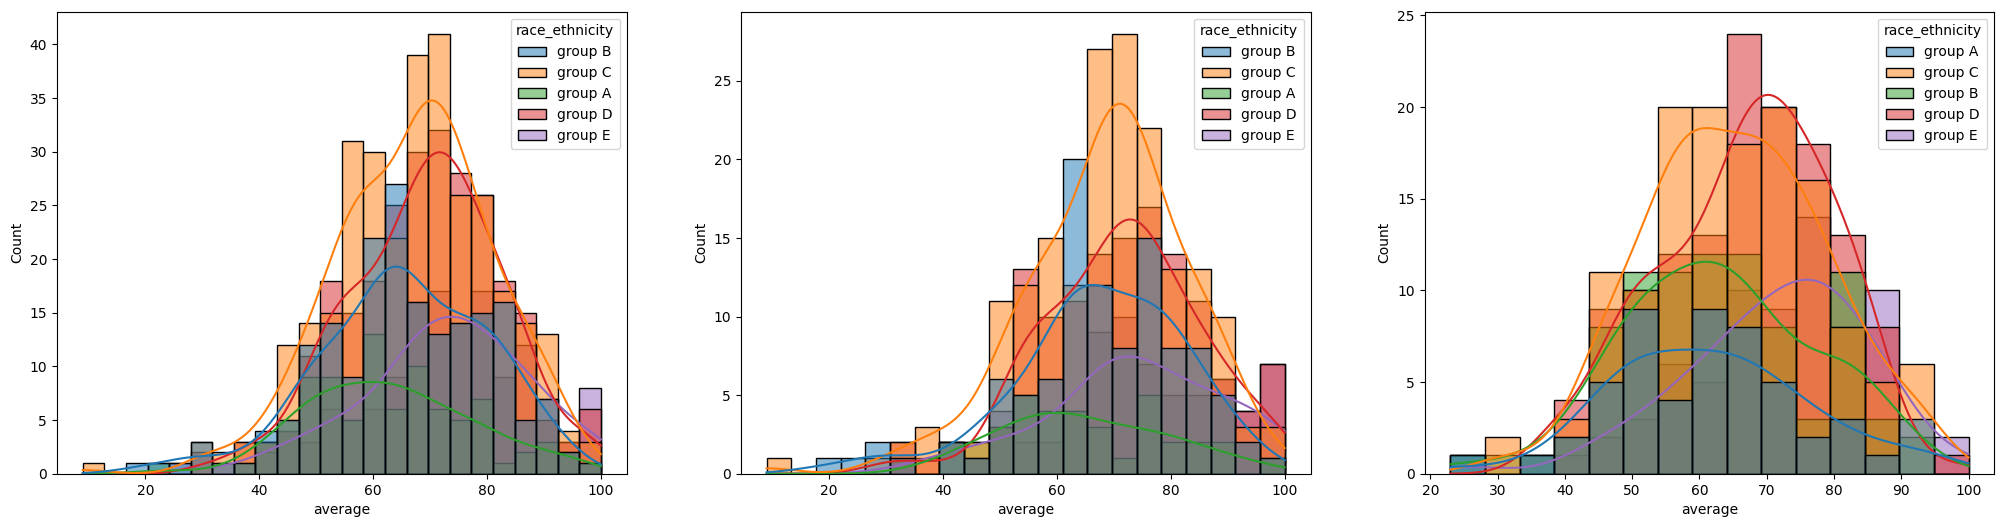

In [40]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde= True,hue='race_ethnicity')
plt.subplot(132)
sns.histplot(data = df[df['gender']=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(133)
sns.histplot(data=df[df['gender']=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

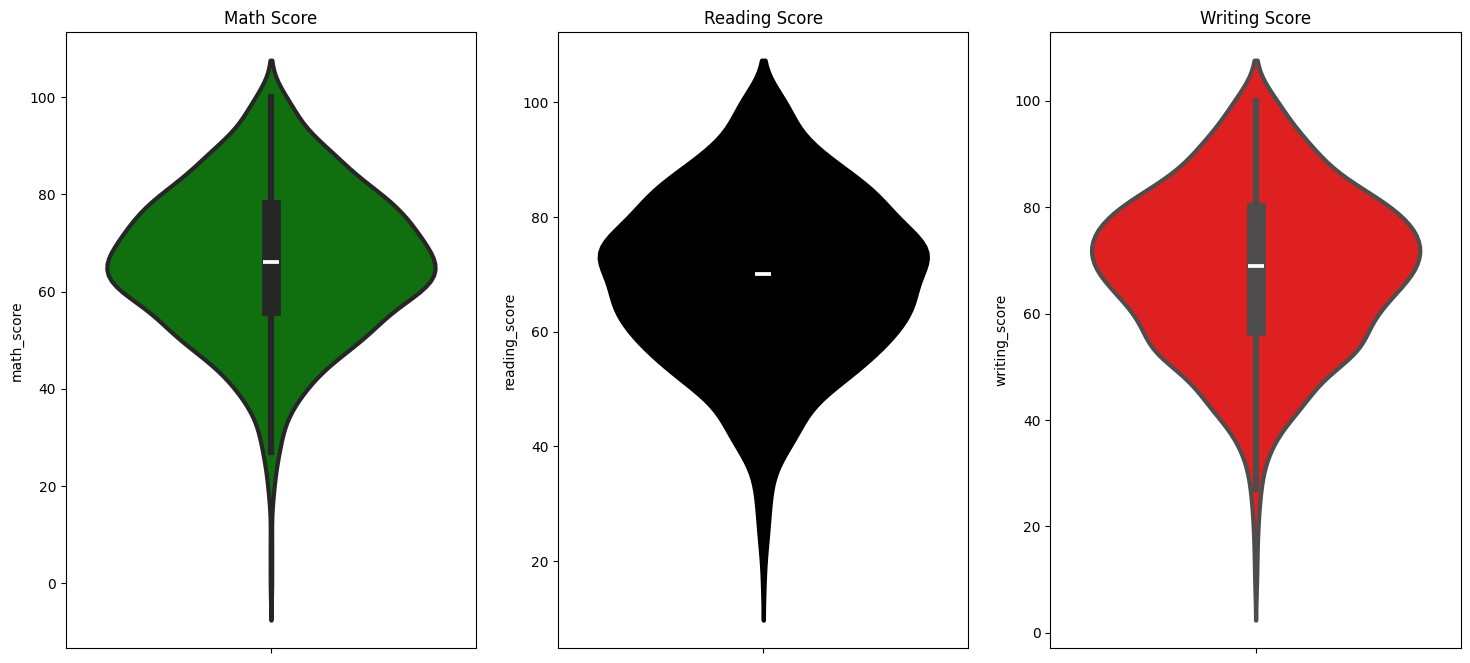

In [45]:
plt.figure(figsize=(18,8))
plt.subplot(131)
plt.title("Math Score")
sns.violinplot(data=df,y='math_score',color= 'green',linewidth=3)
plt.subplot(132)
plt.title("Reading Score")
sns.violinplot(data =df,y='reading_score',color= 'black',linewidth=3)
plt.subplot(133)
plt.title("Writing Score")
sns.violinplot(data =df,y='writing_score',color= 'red',linewidth=3)
plt.show()

In [62]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average'],
      dtype='object')

In [52]:
df.columns
for i in categorical_features:
    print(df[i].unique(),'\n')

['female' 'male'] 

['group B' 'group C' 'group A' 'group D' 'group E'] 

["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] 

['standard' 'free/reduced'] 

['none' 'completed'] 



(np.float64(-1.25), np.float64(1.25), np.float64(-1.25), np.float64(1.25))

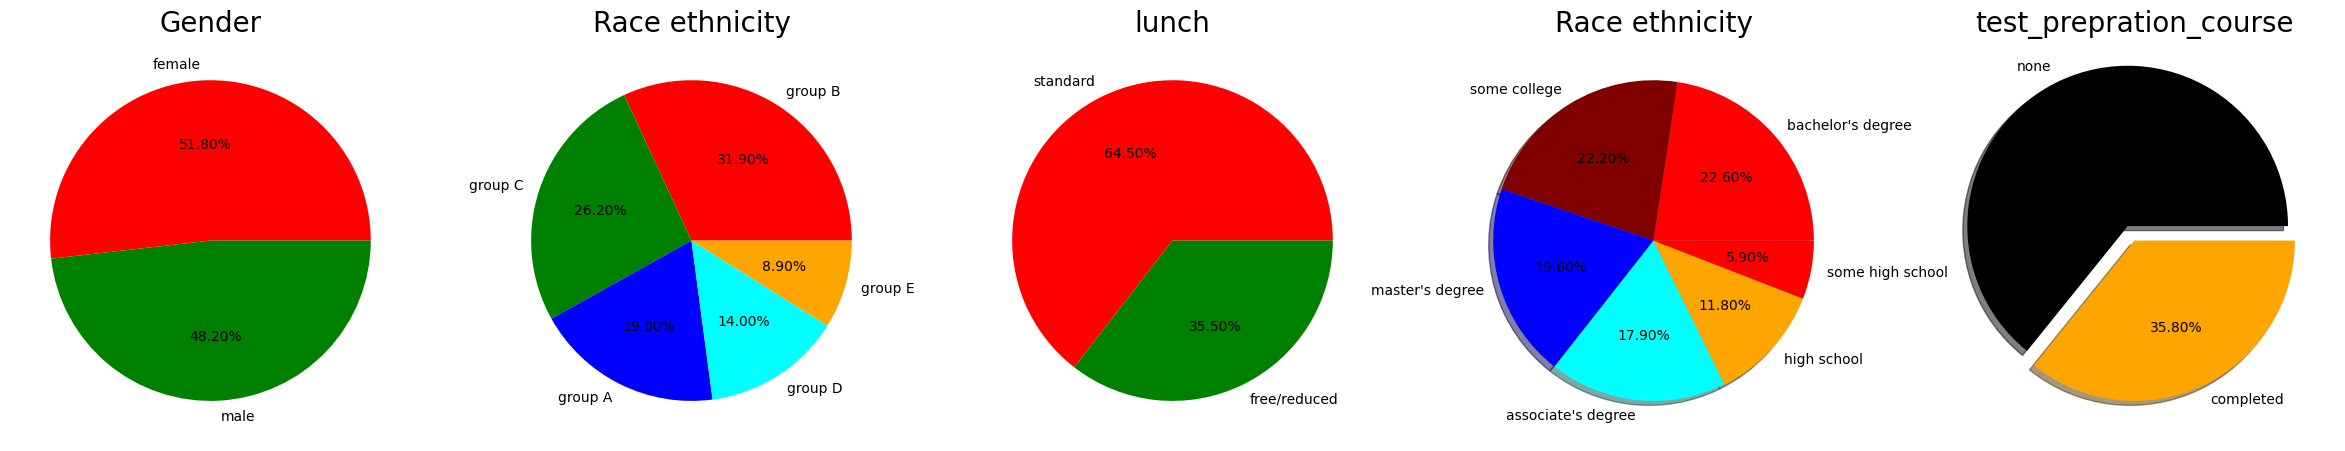

In [75]:
plt.rcParams['figure.figsize'] = (30,20)

plt.subplot(151)
size = df['gender'].value_counts()
label = ['female', 'male']
color = ['red','green']

plt.pie(size,colors=color,labels=label,autopct='%.2f%%')
plt.title('Gender',fontsize=20)
plt.axis("off")

plt.subplot(152)
size = df['race_ethnicity'].value_counts()
label = ['group B', 'group C' ,'group A' ,'group D' ,'group E'] 
color = ['red','green','blue','cyan','orange']

plt.pie(size,colors=color,labels=label,autopct='%.2f%%')
plt.title('Race ethnicity',fontsize=20)
plt.axis("off")

plt.subplot(153)
size = df['lunch'].value_counts()
label = ['standard' ,'free/reduced'] 
color = ['red','green']

plt.pie(size,colors=color,labels=label,autopct='%.2f%%')
plt.title('lunch',fontsize=20)
plt.axis("off")

plt.subplot(154)
size = df['parental_level_of_education'].value_counts()
label = ["bachelor's degree" ,'some college', "master's degree" ,"associate's degree",
 'high school' ,'some high school'] 
color = ['red','maroon','blue','cyan','orange']

plt.pie(size,colors=color,labels=label,autopct='%.2f%%',shadow=True)
plt.title('Race ethnicity',fontsize=20)
plt.axis("off")

plt.subplot(155)
size = df['test_preparation_course'].value_counts()
label = ['none' ,'completed'] 
color = ['black','orange']

plt.pie(size,colors=color,labels=label,autopct='%.2f%%',explode=[0.1,0],shadow=True)
plt.title('test_prepration_course',fontsize=20)
plt.axis("off")

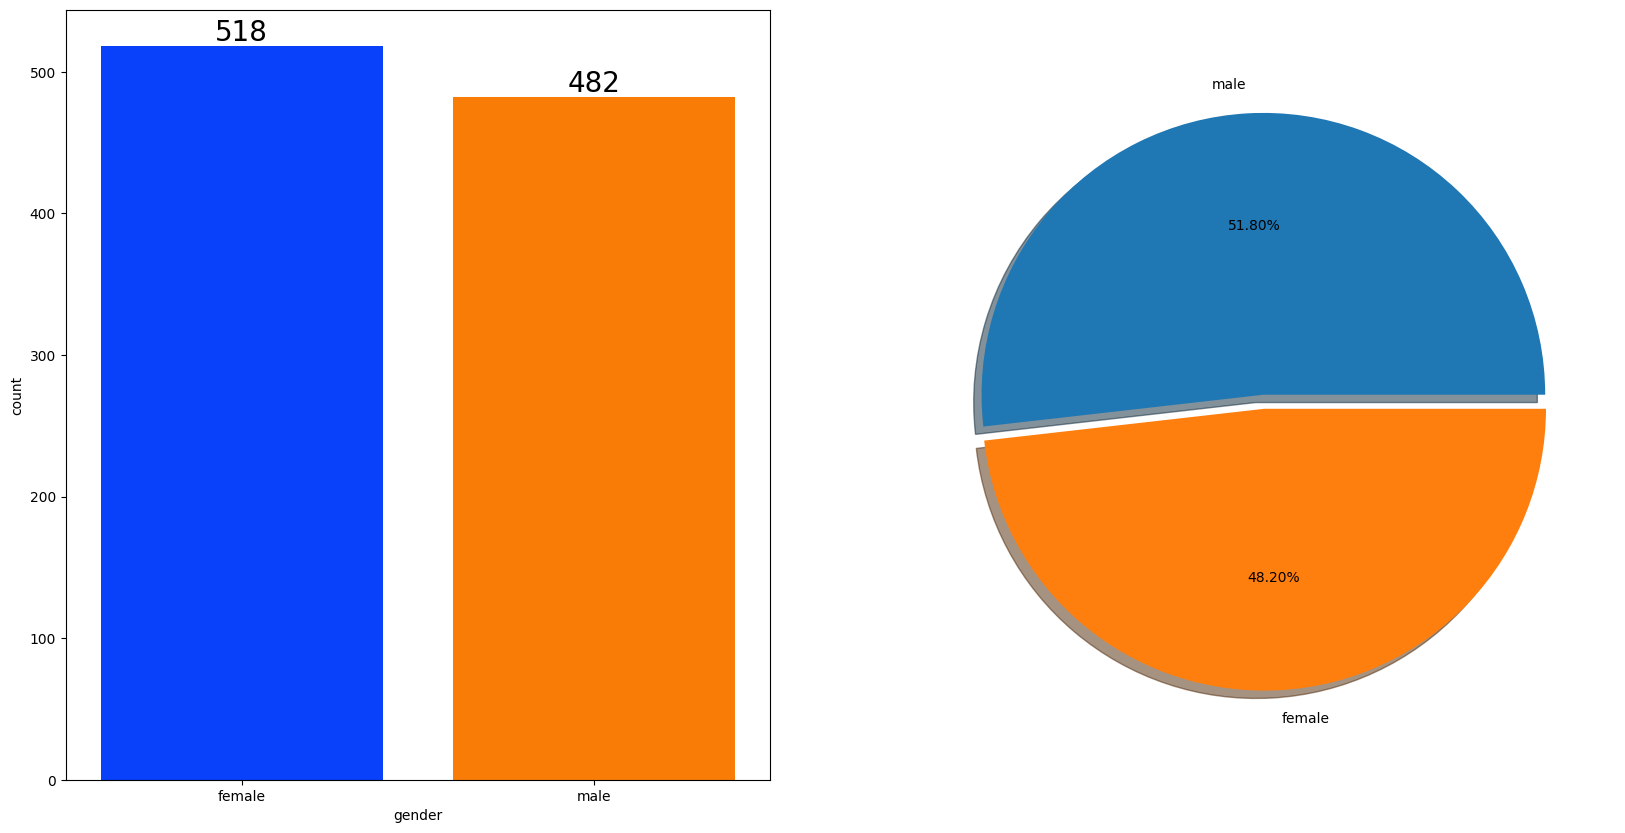

In [84]:
f,ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
plt.pie(x=df['gender'].value_counts(),labels=['male','female'],explode=[0,0.05],autopct='%.2f%%',shadow=True)
plt.show()

In [87]:
gender_group = df.groupby('gender')['math_score'].count()
gender_group

gender
female    518
male      482
Name: math_score, dtype: int64